
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
import pandas as pd
from pyspark.sql import Row, Column
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

In [0]:
# File location and type
file_location = "/FileStore/tables/outputMonthly-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

schema_def = StructType([StructField('Date', StringType(), True),
                     StructField('Open', LongType(), True),
                     StructField('High', LongType(), True),
                     StructField('Low', LongType(), True),
                     StructField('Close', LongType(), True),
                     StructField('Volume', LongType(), True),
])

df = spark.read.format(file_type) \
  .option("schema", schema_def) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

converted_df = df.withColumn("Open", F.col("Open").cast(FloatType())) \
    .withColumn("High", F.col("High").cast(FloatType())) \
    .withColumn("Low", F.col("Low").cast(FloatType())) \
    .withColumn("Close", F.col("Close").cast(FloatType())) \
    .withColumn("Volume", F.col("Volume").cast(FloatType()))


display(converted_df)

# # Count rows
# row_count = df.count()
# print(f'The DataFrame has {row_count} rows.')

# from pyspark.sql.functions import col
# df.filter(col("Volume").contains("176168962")).show()

Date,Open,High,Low,Close,Volume
2024-01-19,162.83,171.5791,157.885,171.48,5.2329776E7
2023-12-29,158.41,166.34,158.0,163.55,8.7358304E7
2023-11-30,145.0,158.6,144.45,158.56,7.8460256E7
2023-10-31,140.04,144.76,135.87,144.64,9.4386976E7
2023-09-29,147.26,151.9299,139.61,140.3,8.2806488E7
2023-08-31,144.25,147.7275,139.76,146.83,8.4274208E7
2023-07-31,133.42,144.605,131.55,144.18,8.5778936E7
2023-06-30,128.44,139.469,127.78,133.81,1.00722016E8
2023-05-31,126.35,130.0699,120.55,128.59,9.5710888E7
2023-04-28,130.97,132.61,124.56,126.41,8.3664112E7


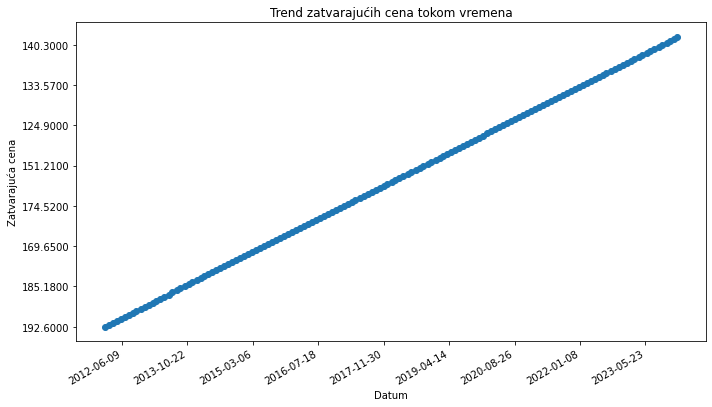

<Figure size 432x288 with 0 Axes>

In [0]:
# Pretvaranje stringa datuma u datumski tip podataka
df = df.withColumn("Date", F.to_date("Date", "yyyy-MM-dd"))

# Analiza 1: Trend zatvarajucih cena tokom vremena
close_price_trend = df.select("Date", "Close").toPandas()
close_price_trend.sort_values("Date", inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(close_price_trend["Date"], close_price_trend["Close"], marker='o', linestyle='-')
plt.title("Trend zatvarajućih cena tokom vremena")
plt.xlabel("Datum")
plt.ylabel("Zatvarajuća cena")
plt.xticks(rotation=45)  # Rotiranje datuma pod uglom od 45 stepeni
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Ograničavanje broja oznaka na x-osi
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.tight_layout()
plt.gcf().autofmt_xdate()  # Automatsko prilagodjavanje datuma
plt.show()

# Prikazivanje grafikona
plt.tight_layout()
plt.show()

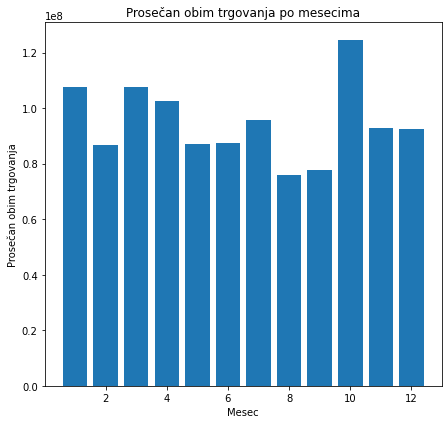

In [0]:
# Analiza 2: Prosecan obim trgovanja po mesecima
average_volume_per_month = df.withColumn("Month", F.month("Date")) \
    .groupBy("Month") \
    .agg(F.avg("Volume").alias("AverageVolume")) \
    .orderBy("Month") \
    .toPandas()

plt.figure(figsize=(12, 6))

# Grafikon prosecnog obima trgovanja po mesecima
plt.subplot(1, 2, 2)
plt.bar(average_volume_per_month["Month"], average_volume_per_month["AverageVolume"])
plt.title("Prosečan obim trgovanja po mesecima")
plt.xlabel("Mesec")
plt.ylabel("Prosečan obim trgovanja")

# Prikazivanje grafikona
plt.tight_layout()
plt.show()

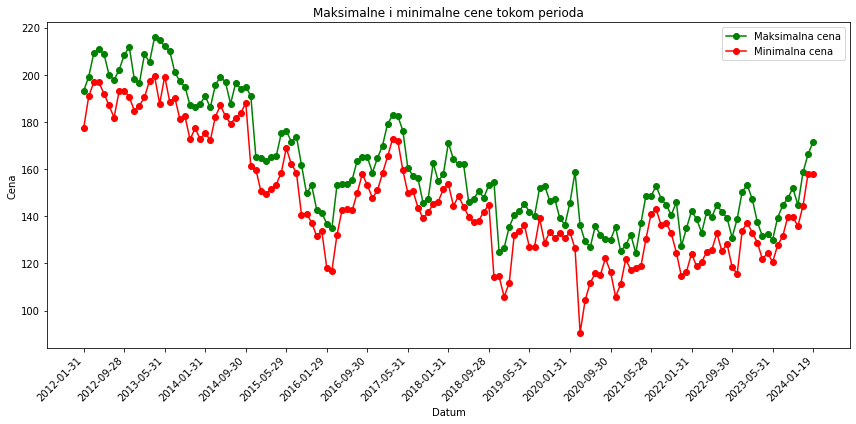

In [0]:
# Analiza 3: Izracunavanje maksimalnih i minimalnih cena
max_prices = converted_df.groupBy("Date").agg(F.max("High").alias("MaxPrice"))
min_prices = converted_df.groupBy("Date").agg(F.min("Low").alias("MinPrice"))

# Spajanje maksimalnih i minimalnih cena
price_range_df = max_prices.join(min_prices, "Date").orderBy("Date").toPandas()

# Kreiranje grafikona
plt.figure(figsize=(12, 6))
plt.plot(price_range_df["Date"], price_range_df["MaxPrice"], label="Maksimalna cena", color="green", marker='o')
plt.plot(price_range_df["Date"], price_range_df["MinPrice"], label="Minimalna cena", color="red", marker='o')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Ograničavanje broja oznaka na x-osi
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.title("Maksimalne i minimalne cene tokom perioda")
plt.xlabel("Datum")
plt.ylabel("Cena")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
data_df = spark.read.format(file_type) \
  .option("schema", schema_def) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

data_df = data_df.withColumn("Close", data_df["Close"].cast(FloatType())) \
    .withColumn("Volume", data_df["Volume"].cast(FloatType()))

# Izbor kolona za korelaciju
corr_analysis_df = data_df.select("Close", "Volume")

# Pretvaranje u vektore
vector_col = "col_features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)

# Izracunavanje Pearsonove korelacije
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray().tolist()

# Kreiranje DataFrame-a sa rezultatima korelacije
columns = ['Close', 'Volume']
df_corr = spark.createDataFrame([(corr_matrix[0][0], corr_matrix[0][1], corr_matrix[1][0], corr_matrix[1][1])], ["Close-Close", "Close-Volume", "Volume-Close", "Volume-Volume"])
df_corr.show()

+-----------+--------------------+--------------------+-------------+
|Close-Close|        Close-Volume|        Volume-Close|Volume-Volume|
+-----------+--------------------+--------------------+-------------+
|        1.0|-0.41078278042072003|-0.41078278042072003|          1.0|
+-----------+--------------------+--------------------+-------------+




## Pearson's correlation test

Na osnovu toplotne mape Pearsonovih korelacionih koeficijenata, možemo izvesti sledeće zaključke:

Postoji vrlo visoka pozitivna korelacija između 'Open', 'High', 'Low', i 'Close' vrednosti. Ovo je očekivano jer se ove vrednosti obično kreću zajedno tokom trgovačkog dana. Koeficijenti korelacije su veoma blizu 1, što ukazuje na skoro savršenu linearnu zavisnost.

'Volume' ima negativnu korelaciju sa 'Open', 'High', 'Low', i 'Close' vrednostima, što znači da kako se jedna od ovih vrednosti povećava, obim trgovanja ('Volume') se obično smanjuje, i obrnuto. Međutim, koeficijenti korelacije su relativno mali (od -0.3 do -0.44), što ukazuje na slabu do umerenu negativnu korelaciju.

Najslabija korelacija je između 'Open' i 'Volume' sa koeficijentom od -0.32. Ovo može ukazivati na to da cene na otvaranju nisu snažan pokazatelj obima trgovanja tokom dana.

Najjača negativna korelacija je između 'Low' i 'Volume' sa koeficijentom od -0.44. To može značiti da veći obim trgovanja može biti povezan sa većom volatilnošću cene, posebno kada su u pitanju najniže dnevne cene.

Zaključak:
Korelaciona analiza pokazuje da postoji jasna povezanost između cena akcija tokom trgovačkog dana, dok je veza između obima trgovanja i cena akcija obrnuta, ali ne toliko snažna. Ovo može biti korisno za investitore i analitičare koji pokušavaju da razumeju kako se tržišne cene odnose na obim trgovanja. Negativna korelacija između 'Volume' i ostalih varijabli može ukazivati na to da visok obim trgovanja može biti rezultat tržišnih korekcija ili veće likvidnosti, što obično dovodi do smanjenja cena.

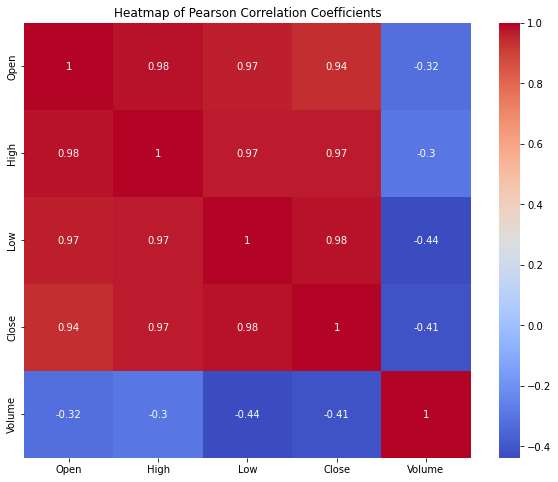

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns

data_df = spark.read.format(file_type) \
  .option("schema", schema_def) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

data_df = data_df.withColumn("Close", data_df["Close"].cast(FloatType())) \
    .withColumn("Volume", data_df["Volume"].cast(FloatType()))

# Konvertovanje svih potrebnih kolona u float
numeric_columns = ["Open", "High", "Low", "Close", "Volume"]  # Lista numerickih kolona
for column in numeric_columns:
    data_df = data_df.withColumn(column, data_df[column].cast("float"))

# Izbor kolona za korelaciju i pretvaranje u vektore
vector_col = "col_features"
assembler = VectorAssembler(inputCols=numeric_columns, outputCol=vector_col)
df_vector = assembler.transform(data_df).select(vector_col)

# Izracunavanje korelacije
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray()

# Kreiranje Pandas DataFrame-a za toplotnu mapu
import pandas as pd
df_corr = pd.DataFrame(corr_matrix, columns=numeric_columns, index=numeric_columns)

# Vizualizacija toplotne mape
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Pearson Correlation Coefficients')
plt.show()


## T-test
Nulta Hipoteza: Ne postoji znacajna razlika izmedju dve grupe 'Close' vrednosti.
Grupisemo 'Close' vrednosti pre i posle nekog dogadjaja, ili na parnim i neparnim danima meseca.
Alternativna Hipoteza: Postoji znacajna razlika izmedju dve grupe 'Close' vrednosti.
Izlaz: p_value = 0.00000000000000000000000027357643240148830752041258
Zakljucak: p_value je manja od 0.05 i time postoji statistički značajna razlika između dve grupe.


In [0]:
from scipy import stats
import pandas as pd

# Mozemo da uporedimo 'Close' vrednosti za dve razlicite grupe dana.
data_df = data_df.withColumn("Close", data_df["Close"].cast("float"))

pandas_df = data_df.select("Close").toPandas()

group1 = pandas_df.iloc[:len(pandas_df)//2]  # Prva polovina podataka
group2 = pandas_df.iloc[len(pandas_df)//2:]  # Druga polovina podataka

# Izvodenje t-testa
t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic[0]}")
print(f"P-value: {p_value[0]: .50f}")

T-statistic: -12.72804069519043
P-value:  0.00000000000000000000000027357643240148830752041258
